<a href="https://colab.research.google.com/github/GastonRAraujo/Materia-Ap_Maq/blob/master/TP3/TP3_Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3.1

In [ ]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

#Utilidad
from sklearn.model_selection import train_test_split

Creo mis datasets de 2D. Necesito crear 2 y luego unificarlos

In [ ]:
N = 100                    #si deseeo que sean igual cantidades
                           # determino un N y lo reparto partes iguales
N_train = int(N / 2)



#Creo el dataset A

# Semilla aletoria
np.random.seed(1)
features_number = 2
dummy_df_A = pd.DataFrame(np.random.normal(scale=7.5, size=(N, features_number)),
                        columns=['X', 'Y'])

dummy_df_A['target'] = 0


#Creo el dataset B

# Semilla aletoria
np.random.seed(546)
features_number = 2
dummy_df_B = pd.DataFrame(np.random.normal(loc = [5,10], scale=5.0, size=(N, features_number)),
                        columns=['X', 'Y'])

dummy_df_B['target'] = 1

dummy_df = pd.concat([dummy_df_A, dummy_df_B], ignore_index=True)

dummy_df

,X,Y,target
0,12.182590,-4.588173,0
1,-3.961288,-8.047265,0
2,6.490557,-17.261540,0
3,13.086088,-5.709052,0
4,2.392793,-1.870278,0
...,...,...,...
195,6.160521,0.550545,1
196,4.390128,12.148235,1
197,3.066699,14.289699,1
198,7.127764,11.014671,1


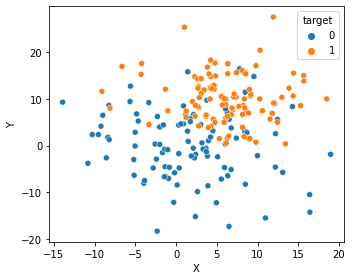

In [ ]:
from matplotlib import pyplot as plt

target_names = ['A', 'B']


plt.figure(figsize=(5, 4))
sns.scatterplot(x="X", y="Y", data=dummy_df, hue = dummy_df['target'])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn import neighbors
X = np.array(dummy_df[['X','Y']])

y = dummy_df['target'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# hacemos la predicción
print(target_names[int(knn.predict([[3, 5]]))])

B


(-14.03486398335064,
 19.062442801047986,
 -18.361283230803544,
 27.533199475962483)

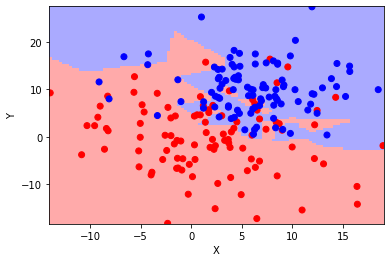

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])



Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('tight')

In [ ]:
#Predigo usando X_test
y_predicted = knn.predict(X_test)

In [ ]:
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        51
           1       0.74      0.82      0.78        49

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100




Podemos repetir pero variando N, k o incluso alguna caracteristica de nuestro dataset

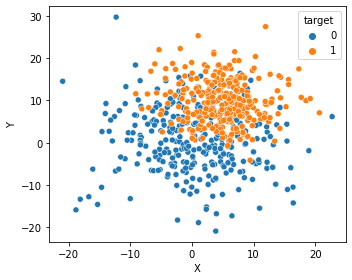

In [ ]:
#Variamos N

N = 300                    #si deseeo que sean igual cantidades

#Creo el dataset A

# Semilla aletoria
np.random.seed(1)
features_number = 2
dummy_df2_A = pd.DataFrame(np.random.normal(scale=7.5, size=(N, features_number)),
                        columns=['X', 'Y'])

dummy_df2_A['target'] = 0


#Creo el dataset B

# Semilla aletoria
np.random.seed(546)
features_number = 2
dummy_df2_B = pd.DataFrame(np.random.normal(loc = [5,10], scale=5.0, size=(N, features_number)),
                        columns=['X', 'Y'])

dummy_df2_B['target'] = 1

dummy_df2 = pd.concat([dummy_df2_A, dummy_df2_B], ignore_index=True)

plt.figure(figsize=(5, 4))
sns.scatterplot(x="X", y="Y", data=dummy_df2, hue = dummy_df2['target'])

plt.tight_layout()
plt.show()

In [ ]:
X2 = np.array(dummy_df2[['X','Y']])

y2 = dummy_df2['target'].tolist()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=42)


knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X2_train, y2_train)

# hacemos la predicción
print(target_names[int(knn.predict([[3, 5]]))])

A


(-21.048137501099053,
 22.83142834279023,
 -20.96900850739692,
 29.789520280284727)

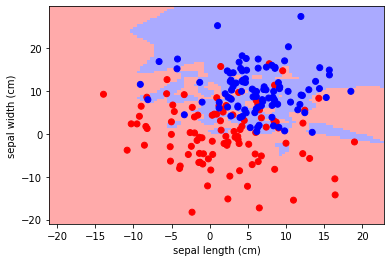

In [ ]:
x_min, x_max = X2[:, 0].min() - .1, X2[:, 0].max() + .1
y_min, y_max = X2[:, 1].min() - .1, X2[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])



Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [ ]:
#Predigo usando X_test
y2_predicted = knn.predict(X2_test)


print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y2_test, y2_predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       156
           1       0.71      0.76      0.74       144

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300




Ahora prubo utilizando k = 10 y los dataset originales. 

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        51
           1       0.74      0.86      0.79        49

    accuracy                           0.78       100
   macro avg       0.79      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100




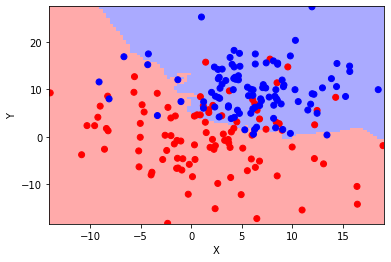

In [ ]:
from sklearn import neighbors
X = np.array(dummy_df[['X','Y']])

y = dummy_df['target'].tolist()

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.5, random_state=42)


knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X3_train, y3_train)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])



Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('X')
plt.ylabel('Y')

#Predigo usando X_test
y3_predicted = knn.predict(X3_test)


print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y3_test, y3_predicted)))

Observo una perdida de rendimiento al aumentar el tamaño de mi dataset pero mantener k = 1 debido a la gran sensibilidad del modelo.

Por el contrario si aumentamos k (de forma controlada para evitar overfiting debido a k>>1) vemos una mejora en el rendimiento del modelo.